DSCI 2012: Data Science Lab - Data Wrangling
# Lab 5: Before you can Train AI, the Data Must be Beautiful

Ultimately, data science tools and resources serve the goal of extracting meaning from the world or for building smart systems. To build smart systems, we must train statistical or machine learning models that can be baked into a digitally operated system like a self-driving car or even an entire business enterprise (like Uber). 

This lab will help you learn to go through the steps implicit in bringing data from fairly clean place all the way into a dataset that can be used for machine learning. We will even run some rudimentary machine learning code that will build a classification model.

The lab makes use of a dataset commonly used for introducing machine learning to students, the passengers of the Titanic, including whether or not each survived. If you make it through this lab, you also will have done all the work (and more) necessary to compete on Kaggle in the first competition they recommend for people new to the platform, the [Titanic Challenge.](https://www.kaggle.com/competitions/titanic)

## Importing Libraries

First, let's import the libraries needed both for data wrangling, for visualization, and for machine learning.

**Name: Isha Shrestha**   
**NetID: is418**


In [3]:
# Import the necessary libraries for Data Wrangling

import pandas as pd
import numpy as np

# install sklearn if isn't installed already
# try to remember that this is a great way to install code in the
# future by testing if it is already installed first
try:
  from sklearn.metrics import mean_absolute_error
except:
  !conda install sklearn
  from sklearn.metrics import mean_absolute_error

# Import some libraries for machine learning
# Note: even though the AI lab in the MSU data science program will make use of 
# Keras / Tensor Flow, it will still use SkiKit Learn for many supporting purposes
# such as dividing data into training vs. test data, so you're learning something
# here that will be useful to you at any level of knowledge you reach

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Import some libraries for visualization
# Seaborn is really nice, as it works alongside matplotlib, and it is beautiful.
# Seaborn documentation is here: https://seaborn.pydata.org/
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
!pip install xgboost
!pip install lightgbm


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


## Exploring the Data

In [7]:
# load your passenger data
# note how you can tell pandas to treat an individual column as a number type
# right from the beginning - here we're telling it to treat the 'Age' column
# as a number
passengers = pd.read_csv("titanic.csv",dtype={'Age': np.float64})

# Exercise 1:
    
# a. Supply the code necessary to view six lines of the passengers dataframe head
passengers.head(6)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"


In [8]:
# b. Supply the code necessary to view six lines of the passengers dataframe tail
passengers.tail(6)
# c. What do you notice about the last line? 
# [put your answer here]
#The last row only has null values.

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yes, the last line is a problem. We should definitely drop it.

An easy way to handle this is to use df.drop() and we can specify two parameters - which row (labels), and which axis (0 = means row, 1 = means column)

In [10]:
# take this time to look at the documentation for .drop see where things are documented:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
# hint: passengers = passengers.drop(labels=?, axis = ?)
passengers_copy = passengers.copy()
# d. Supply the correct label and axis to take care of that last row, then show the tail again
passengers = passengers.drop(labels=1309, axis = 0)
print(passengers.tail())
# e. How would chat-gpt recommend (chat.openai.com) recommend dropping it?

# put your chat-gpt prompt in a comment here:
# How would you drop a row in a dataframe?

# put the code it suggested in a comment here:
passengers_copy.drop(1309,inplace=True)
print(passengers_copy.tail())


      pclass  survived                       name     sex   age  sibsp  parch  \
1304     3.0       0.0       Zabour, Miss. Hileni  female  14.5    1.0    0.0   
1305     3.0       0.0      Zabour, Miss. Thamine  female   NaN    1.0    0.0   
1306     3.0       0.0  Zakarian, Mr. Mapriededer    male  26.5    0.0    0.0   
1307     3.0       0.0        Zakarian, Mr. Ortin    male  27.0    0.0    0.0   
1308     3.0       0.0         Zimmerman, Mr. Leo    male  29.0    0.0    0.0   

      ticket     fare cabin embarked boat   body home.dest  
1304    2665  14.4542   NaN        C  NaN  328.0       NaN  
1305    2665  14.4542   NaN        C  NaN    NaN       NaN  
1306    2656   7.2250   NaN        C  NaN  304.0       NaN  
1307    2670   7.2250   NaN        C  NaN    NaN       NaN  
1308  315082   7.8750   NaN        S  NaN    NaN       NaN  
      pclass  survived                       name     sex   age  sibsp  parch  \
1304     3.0       0.0       Zabour, Miss. Hileni  female  14.5   

The Features of this Dataset Include:

    survival - Survival (0 = No; 1 = Yes)
    class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    name - Name
    sex - Sex
    age - Age
    sibsp - Number of Siblings/Spouses Aboard
    parch - Number of Parents/Children Aboard
    ticket - Ticket Number
    fare - Passenger Fare
    cabin - Cabin
    embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
    boat - Lifeboat (if survived)
    body - Body number (if did not survive and body was recovered)

"Sex" is an interesting data field/column/property. Think of the movie 'Titanic' and of the patterns of etiquette during danger that might have prevailed in 1912. I wonder what percentage of women vs. men died?

In [12]:
# Get a list of "survived" by limiting to places where sex is "female"
# non-query way:  women = passengers.loc[passengers.sex == 'female']

women = passengers.query("sex == 'female'")

# To get the survival rate, divide the sum of survivals (add up all the 1's) 
# and divide by the number of women

rate_women = sum(women['survived'])/len(women['survived'])

print("% of women who survived:", rate_women)


% of women who survived: 0.7274678111587983


Wow, 73% of women passengers survived. What about the percentage of men? That's your exercise.

In [14]:
# Exercise 2:

# a. find a list containing survival info for men
men = passengers.loc[passengers.sex == "male"]

# b. print the data type that was returned by the previous operation:

print(type(men))
# c. calculate the survival rate of men

rate_men = sum(men['survived'])/len(men['survived'])
# d. print out the survival rate for men
print(rate_men)

# e. what do you notice about men's vs. women's survival rates?
# put your answer here in a comment
#only 19% of men survived ; which is almost 4 times less than the rate of women who survived

<class 'pandas.core.frame.DataFrame'>
0.19098457888493475


We're starting to understand this data a little bit.

But maybe we should have visualized the data first and may have seen this sex difference right away.

## Visualizing the Data

Let's use the seaborn "pair plot" to look at the relationship between each variable in the dataset and survival.

You should take this opportunity to read about the pair plot (https://pythonbasics.org/seaborn-pairplot/) and how it can be used in exploratory analysis.

Run the following code and be amazed.

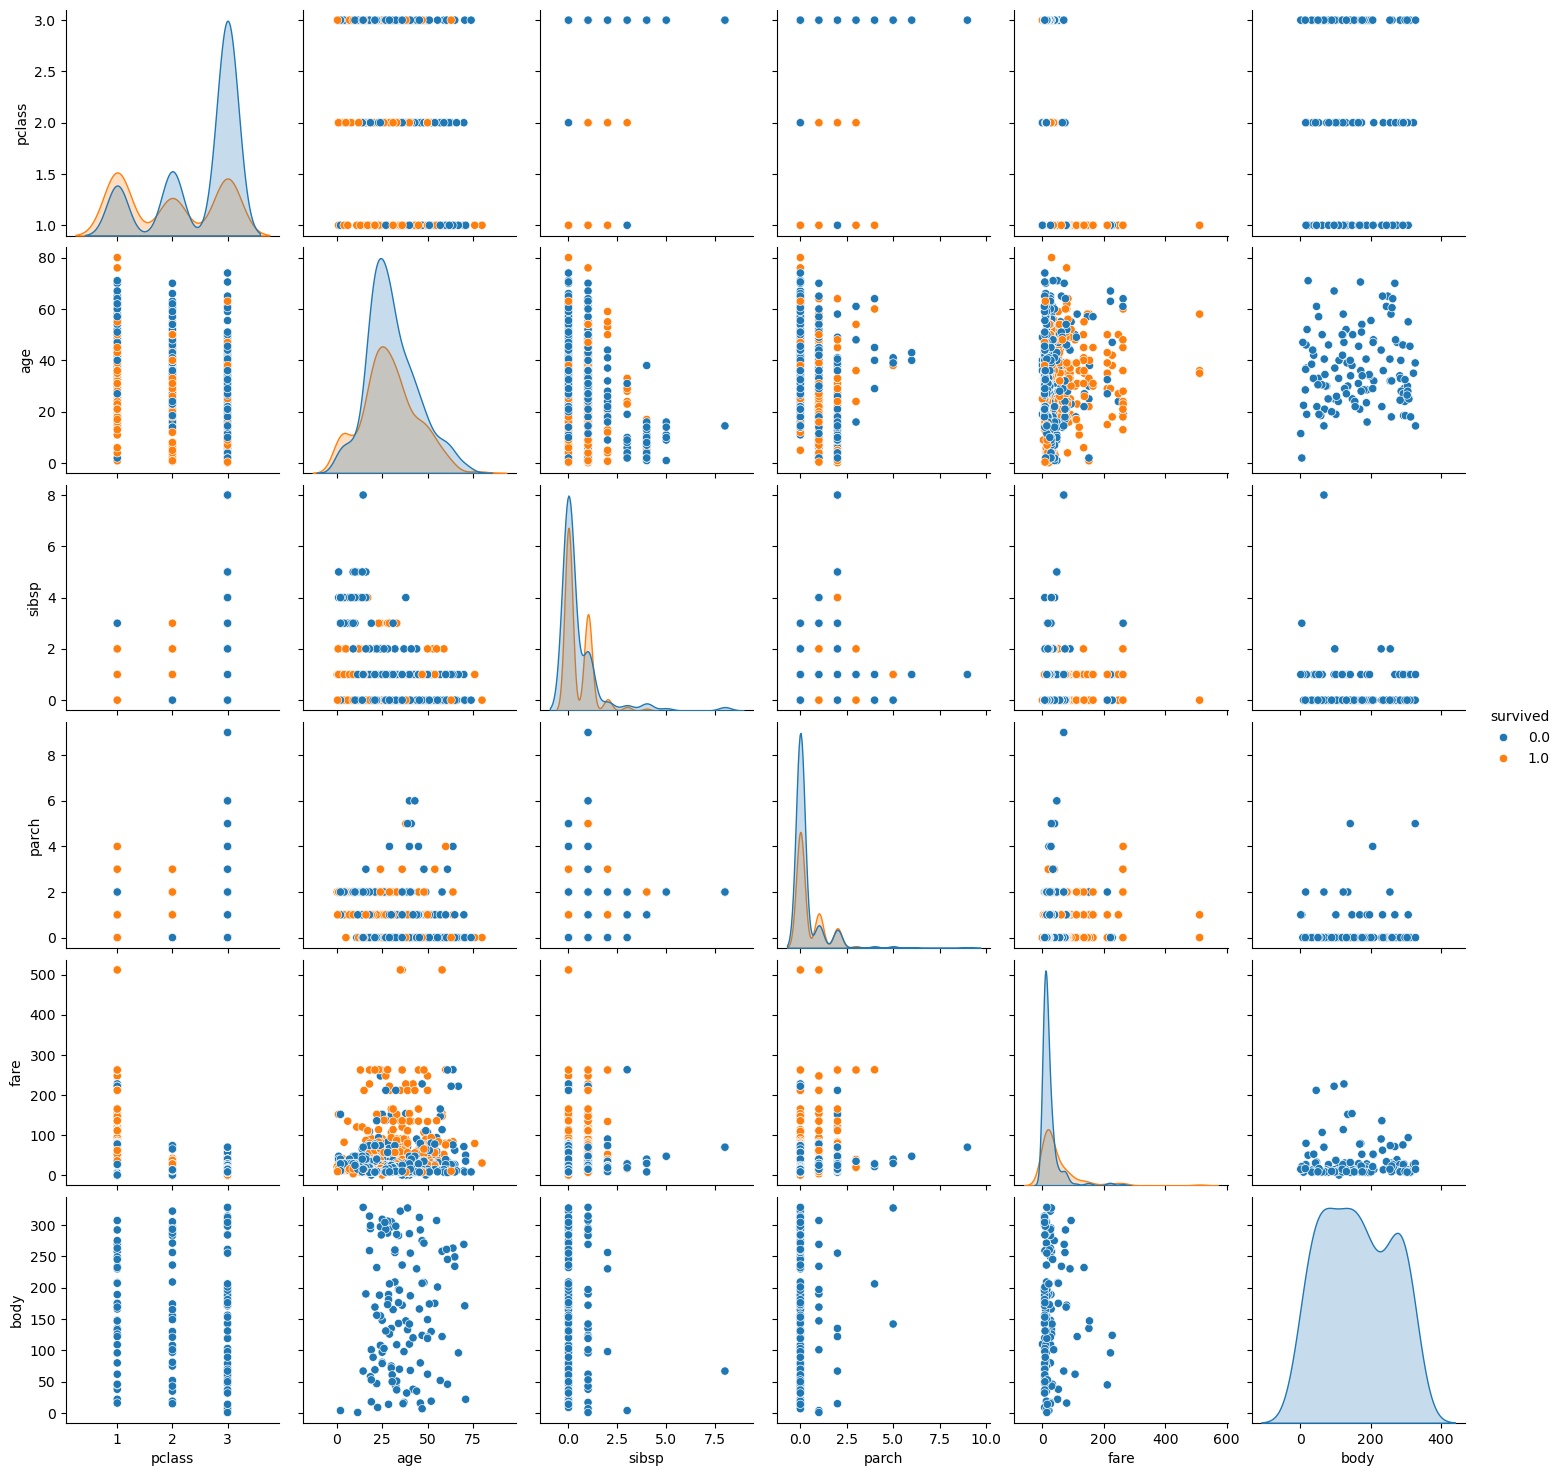

In [16]:
# call the pairplot and shade the values based on survival
# note, this code takes a few seconds to run
sns.pairplot(data=passengers, hue='survived')
plt.show()

Take a minute to figure out what this grid means - that each row contains pair plots of each property to every other property.

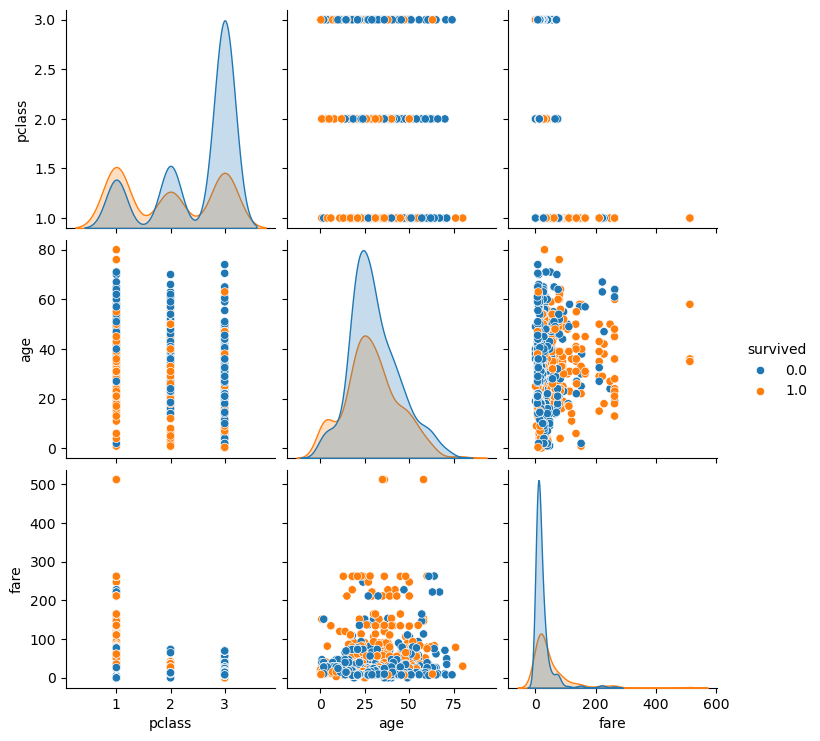

In [18]:
# Exercise 3

# a. Question: Why are there no survivors shown on the "body" row?
# The 'body'row refers to whether a bosy was recovered after the sinking of the Titanic.If a passenger's
#body was recovered, it means that they did not survive.So, survivors would not have a value in body column.

# b. Question: why do you think that the sex column wasn't visualized?
# The "sex" column is categorical, not numerical, which makes it less suitable for pairplot visualizations, 
# as pairplots are primarily used for comparing numerical features.

# c. Using the documentation of pair plots, show only the plots only for class, age, and fare price.
g = sns.pairplot(data=passengers, vars=["pclass", "age","fare"],hue='survived')
plt.show()

## Handling Missing Values

Now, let's deal with missing values. First, we'll see what's missing.

In [20]:
# Are there missing values?

passengers.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Start with the easiest first. Just two rows are missing the location from which the passenger embarked. Do we really think the place of embarking would make a difference in whether the person lived or died? Are Cherbourg, Queenstown, and Southampton radically different in terms of the strength of swimmers who are born there? Probably not.

So, let's just fill in any unknowns with a new "unknown" town and be done with it.

In [22]:
# remember .loc[rows,columns]
# find the rows where embarked is null, and assign 'U' to the 'embarked' column on those rows:
passengers.loc[passengers['embarked'].isnull(), 'embarked'] = 'U'

passengers.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

Now, let's tackle age and fare. We're missing 263 values and 1 value respectively there. How about we just replace unknown ages with the median age value and unknown fares with the median fare value?

In [24]:
# Replace missing ages with the median age. Notice that we're using 
# convenient "dot notation" to reference columns
passengers.loc[passengers.age.isnull(), 'age'] = passengers.age.median()

passengers.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [25]:
# Exercise 4

# a. Replace missing fare values with the median fare
passengers.loc[passengers['fare'].isnull(), 'fare'] = passengers.fare.median()

# b. Show a summary of null fields to see where we stand
passengers.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

Now, the "cabin" column looks a little freeform. How about we create an Unknown Cabin entry into any blank cabin fields? Maybe the fact that the cabin is "unknown" is a good piece of information - maybe these are stowaways or vagabonds?

In [27]:
# Exercise 5

# a. replace the missing cabins with the string "Unknown"
passengers.loc[passengers['cabin'].isnull(),'cabin']= "Unknown"

# b. Show a summary of null fields to see where we stand
passengers.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

Since "body" and "boat" essentially only exist if the person's body was tagged (deceased) or if they were saved in a boat (survived), then we don't really need to worry about those columns. They essentially just mean the same thing as the "survived" column.

"Destination" also feels like something that wouldn't matter to survival, so let's not even worry about that feature.

## Handling Categorical Data

Some features are categorical, though, and we need to make them numeric for machine learning.

We've already seen that sex is probably determinative in some cases for survival, so let's convert sex from a categorical variable into two dummy variables (one-hot encoded variables) using the Pandas function [df.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [29]:
# This code will create dummy variables from a single categorical column
passengers = pd.get_dummies(passengers, columns=["sex"], prefix="sex")
passengers



,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",True,False
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",False,True
2,1.0,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",False,True
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",14.5000,1.0,0.0,2665,14.4542,Unknown,C,NaN,328.0,NaN,True,False
1305,3.0,0.0,"Zabour, Miss. Thamine",28.0000,1.0,0.0,2665,14.4542,Unknown,C,NaN,NaN,NaN,True,False
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",26.5000,0.0,0.0,2656,7.2250,Unknown,C,NaN,304.0,NaN,False,True
1307,3.0,0.0,"Zakarian, Mr. Ortin",27.0000,0.0,0.0,2670,7.2250,Unknown,C,NaN,NaN,NaN,False,True


In [30]:
# Exercise 5

# a. Which columns were added? 
# sex_female and sex_male

# b. Why were the columns named as they are?
# because the prefix was set to be sex and then it was followed by the sex categories

# c. Create dummy variables for the "embarked" and use "leftFrom" as the prefix for the name
passengers = pd.get_dummies(passengers, columns=['embarked'],prefix='leftFrom')
# d. show the resulting data
passengers.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,sex_female,sex_male,leftFrom_C,leftFrom_Q,leftFrom_S,leftFrom_U
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,B5,2,NaN,"St Louis, MO",True,False,False,False,True,False
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",False,True,False,False,True,False
2,1.0,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False,False,False,True,False
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",False,True,False,False,True,False
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False,False,False,True,False


## Converting a Number to Boolean or Just an Int

Survived still doesn't look like a boolean column. Pandas probably just treated the number like a floating point number instead of a 1/0 yes/no.

In [32]:
# Let's interpret that column as a plain int since Boolean would create true/false and we 
# like to use numbers for machine learning
passengers.survived=passengers.survived.astype(int)

passengers

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,sex_female,sex_male,leftFrom_C,leftFrom_Q,leftFrom_S,leftFrom_U
0,1.0,1,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,B5,2,NaN,"St Louis, MO",True,False,False,False,True,False
1,1.0,1,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",False,True,False,False,True,False
2,1.0,0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False,False,False,True,False
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",False,True,False,False,True,False
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0,"Zabour, Miss. Hileni",14.5000,1.0,0.0,2665,14.4542,Unknown,NaN,328.0,NaN,True,False,True,False,False,False
1305,3.0,0,"Zabour, Miss. Thamine",28.0000,1.0,0.0,2665,14.4542,Unknown,NaN,NaN,NaN,True,False,True,False,False,False
1306,3.0,0,"Zakarian, Mr. Mapriededer",26.5000,0.0,0.0,2656,7.2250,Unknown,NaN,304.0,NaN,False,True,True,False,False,False
1307,3.0,0,"Zakarian, Mr. Ortin",27.0000,0.0,0.0,2670,7.2250,Unknown,NaN,NaN,NaN,False,True,True,False,False,False


## Data are Beautiful, Now Let's Split for Machine Learning

Now, it's time for some magic - creating the data we need for machine learning.

Please don't worry if there is a lot of new stuff in the next few cells. Just go along for the ride and try to understand each part.

We will want to divide our dataset into 1) "training data" to build a model, and then 2) "test data" that will allow us to test our model on new data that we didn't use to build our model (that would be cheating).

Machine Learning naming conventions are to use lower case "y" for our data labels that we'll use during training.

In [34]:
# Get our survival training labels
y = passengers.survived

Now, we can get our data that we want to include for training. These would be the fields that we think might be relevant to predicting whether a passenger survived (y=1) or perished (y=0).

Let's start with class, age, and sibsp only.

The naming convention for the data we'll be using for training is upper-case X ("X")

In [36]:
# make a list of our features
analysis_features = ['pclass','age','sibsp']

# grab a data frame that contains our features
X = passengers[analysis_features]

# let's see what it looks like
X

,pclass,age,sibsp
0,1.0,29.0000,0.0
1,1.0,0.9167,1.0
2,1.0,2.0000,1.0
3,1.0,30.0000,1.0
4,1.0,25.0000,1.0
...,...,...,...
1304,3.0,14.5000,1.0
1305,3.0,28.0000,1.0
1306,3.0,26.5000,0.0
1307,3.0,27.0000,0.0


### Now, let's split the data into training and test data.

Then, let's be sure we create training / test data using "train_test_split" - something we imported from skikit learn. The documentation is here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [38]:
# Notice how cool it is that a method in Python can return more than one value
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 1)

# For example, let's look at our validation labels
val_y

201     0
115     0
255     1
1103    0
195     1
       ..
34      0
85      1
984     1
156     0
670     0
Name: survived, Length: 328, dtype: int32

## Machine Learning is a Go

Now, let's try to do some model training using a simple machine learning algorithm known as "decision trees."

### Train the Model

We'll use a simple "classifier" since our goal is just to predict the bare yes/no - did the passenger die?

In [40]:
# Specify Model
ourModel =  DecisionTreeClassifier(random_state=1)

# Fit Model - the .fit method tries to fit the model to the training data set (X) against the labels (y)
ourModel.fit(train_X, train_y)


DecisionTreeClassifier(random_state=1)

### Validate the Model

Now, let's validate our new model against test data

In [42]:
survivalPredictions = ourModel.predict(val_X)

accuracyScore = accuracy_score(val_y,survivalPredictions)

print(f"Validation Accuracy: {accuracyScore}")

Validation Accuracy: 0.625


Wow, 62.5% accuracy. Not bad, right? Better than a coin flip (50%) but still not as good as including sex which, as we've seen, seems to be an important determiner of survival.

In [44]:
# Exercise 6: Redo with More Features

# a. For this exercise, re-run the split, training, and validation 
# but before splitting, start with a dataset that also includes our two sex columns
y_sex_incl = passengers.survived
analysis_features = ['pclass','age','fare', 'sex_female','sex_male','sibsp','parch']
X_sex_incl = passengers[analysis_features]
train_X_sex_incl, val_X_sex_incl, train_y_sex_incl, val_y_sex_incl = train_test_split(X_sex_incl, y_sex_incl,random_state = 1)
ourModel_sex_incl = DecisionTreeClassifier(random_state=1)
ourModel_sex_incl.fit(train_X_sex_incl, train_y_sex_incl)
survivalPredictions_sex_incl = ourModel_sex_incl.predict(val_X_sex_incl)
accuracyScore_sex_incl = accuracy_score(val_y_sex_incl, survivalPredictions_sex_incl)

print(f"Validation Accuracy: {accuracyScore_sex_incl}")

# b. Is your accuracy better with more features?
# yes

Validation Accuracy: 0.7560975609756098


In [45]:
# Exercise 7: Redo with Different Method

# a. For this exercise, re-run the training, and validation
# but use a Random Forest Classifier with these settings
ourModel2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
ourModel2.fit(train_X_sex_incl, train_y_sex_incl)
survivalPredictions2 = ourModel2.predict(val_X_sex_incl)
accuracyScore2 = accuracy_score(val_y_sex_incl, survivalPredictions2)

print(f"Validation Accuracy: {accuracyScore2}")

# b. Is your accuracy better with a better technique?
# the accuracy is a bit better with random forest classifier

Validation Accuracy: 0.801829268292683


In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

C:\Users\ishas\AppData\Local\Temp\ipykernel_3332\3967063248.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(classifiers))


Nearest Neighbors: Validation Accuracy = 0.7500
Linear SVM: Validation Accuracy = 0.8049
RBF SVM: Validation Accuracy = 0.7774
Gaussian Process: Validation Accuracy = 0.7988
Decision Tree: Validation Accuracy = 0.8018
Random Forest: Validation Accuracy = 0.7683
Neural Net: Validation Accuracy = 0.7866
AdaBoost: Validation Accuracy = 0.7988
Naive Bayes: Validation Accuracy = 0.8201


C:\Users\ishas\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA: Validation Accuracy = 0.4207


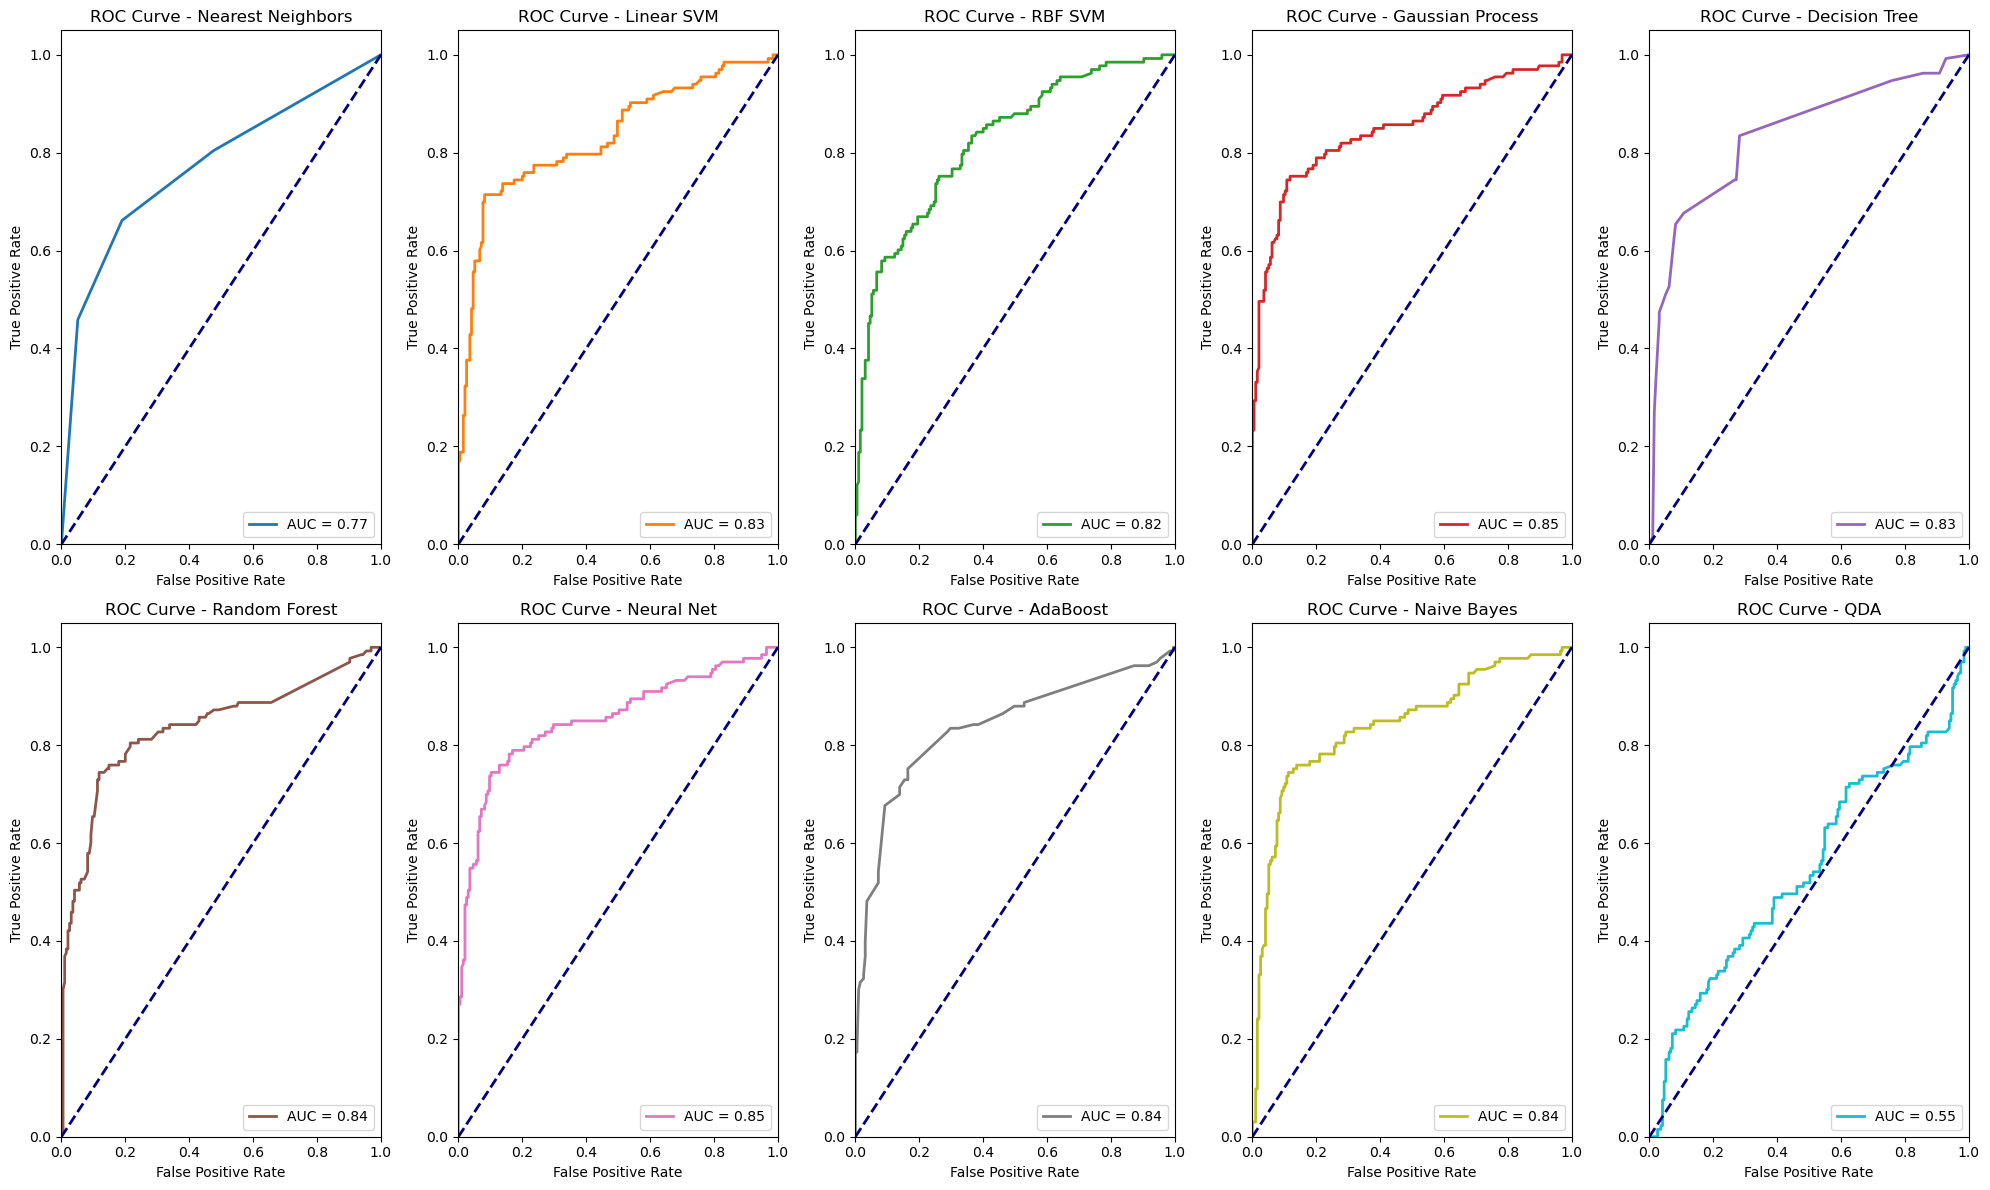

C:\Users\ishas\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


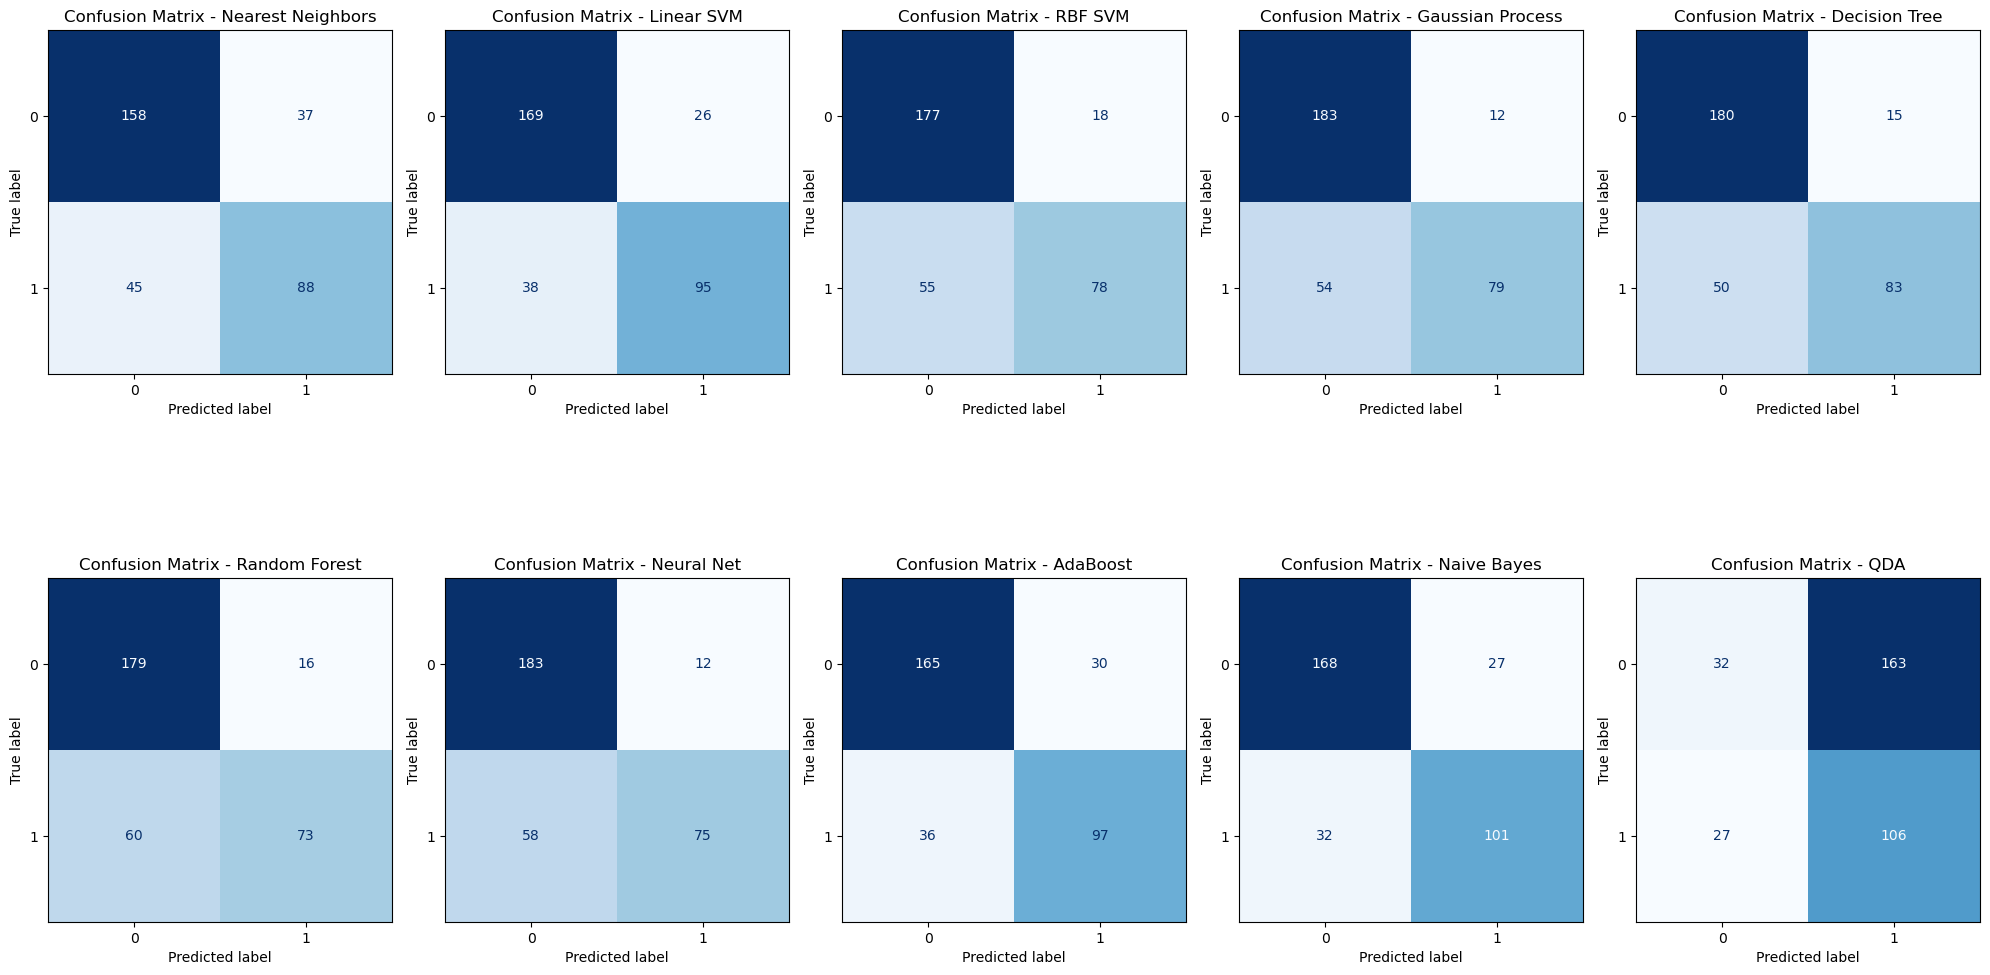


The best classifier is Naive Bayes with an accuracy of 0.8201


In [68]:
# Bonus: If you have time

# Ba. Re-run the training, and validation
# but use a different classifier from scikit like
# Nearest Neighbors, Linear SVM, RBF SVM, Gaussian Process, Neural Net, AdaBoost, Naive Bayes, QDA, etc.
# whoever gets the best accuracy wins a small prize
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42, probability=True),  # enable probability for ROC curve
    SVC(gamma=2, C=1, random_state=42, probability=True),  # enable probability for ROC curve
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

# Assuming you already have your real data in these variables:
# X_sex_incl: The features dataframe
# y_sex_incl: The target variable (e.g., 'survived')

# Split your real dataset into training and validation sets
train_X_sex_incl, val_X_sex_incl, train_y_sex_incl, val_y_sex_incl = train_test_split(X_sex_incl, y_sex_incl, random_state=1)

# Initialize dictionaries to store accuracies and AUCs
accuracies = {}
roc_aucs = {}

# Set up the plot for ROC curves
plt.figure(figsize=(20, 12))
colors = plt.cm.get_cmap('tab10', len(classifiers))

# Loop through classifiers and evaluate them on your real dataset
for idx, (name, clf) in enumerate(zip(names, classifiers)):
    # Standardize and train the classifier
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(train_X_sex_incl, train_y_sex_incl)
    
    # Get accuracy
    predictions = clf.predict(val_X_sex_incl)
    accuracy = accuracy_score(val_y_sex_incl, predictions)
    accuracies[name] = accuracy
    print(f"{name}: Validation Accuracy = {accuracy:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(val_y_sex_incl, predictions)
    
    # ROC Curve (only if binary classification)
    if len(np.unique(val_y_sex_incl)) == 2:
        if hasattr(clf, "decision_function"):
            y_score = clf.decision_function(val_X_sex_incl)
        else:
            y_score = clf.predict_proba(val_X_sex_incl)[:, 1]
        
        # Calculate ROC AUC
        roc_auc = roc_auc_score(val_y_sex_incl, y_score)
        roc_aucs[name] = roc_auc
        fpr, tpr, _ = roc_curve(val_y_sex_incl, y_score)
        
        # Plot ROC curve
        plt.subplot(2, 5, idx + 1)
        #AUC- area under the curve ; 1 - 0 ; 1-perfect classifier
        plt.plot(fpr, tpr, color=colors(idx), lw=2, label=f"AUC = {roc_auc:.2f}")
        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {name}")
        plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Set up the plot for Confusion Matrices
plt.figure(figsize=(20, 12))

# Plot all confusion matrices side by side
for idx, (name, clf) in enumerate(zip(names, classifiers)):
    # Standardize and train the classifier
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(train_X_sex_incl, train_y_sex_incl)
    
    # Get accuracy
    predictions = clf.predict(val_X_sex_incl)
    
    # Confusion Matrix
    cm = confusion_matrix(val_y_sex_incl, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot confusion matrix
    plt.subplot(2, 5, idx + 1)
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=False)
    plt.title(f"Confusion Matrix - {name}")

plt.tight_layout()
plt.show()

# Find the best classifier based on accuracy
best_classifier = max(accuracies, key=accuracies.get)
print(f"\nThe best classifier is {best_classifier} with an accuracy of {accuracies[best_classifier]:.4f}")